<a href="https://colab.research.google.com/github/tmquan11032003/Machine_Learning/blob/main/E-Commerce_Shipping_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# data manipulation
import numpy as np
import pandas as pd


# data visualization
import seaborn as sns
import matplotlib.pyplot as plt


# data processing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder,
                                   MinMaxScaler, StandardScaler,
                                   LabelEncoder)
from sklearn.compose import ColumnTransformer

# imblanced dataset
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler
from imblearn.combine import SMOTEENN

# binary classification
from sklearn.preprocessing import PolynomialFeatures


# modelling
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier,ExtraTreesClassifier)
from sklearn.tree import (DecisionTreeClassifier, ExtraTreeClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import metrics


# metrics
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, recall_score, precision_score, f1_score, accuracy_score,roc_auc_score,roc_curve



# 1. Data Overview and Processing

In [80]:
file_url = 'https://drive.google.com/file/d/1k4dh7DG1PJS5Vb3a3T0xWmU9Z8VHKrjV/view?usp=sharing'
file_id = file_url.split('/')[-2]
url = 'https://drive.google.com/uc?id=' + file_id

print(file_id)
print(url)

df = pd.read_csv(url, index_col = 'ID')

1k4dh7DG1PJS5Vb3a3T0xWmU9Z8VHKrjV
https://drive.google.com/uc?id=1k4dh7DG1PJS5Vb3a3T0xWmU9Z8VHKrjV


In [81]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [82]:
df.tail()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10997,C,Ship,5,4,242,5,low,F,4,1155,0
10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10999,D,Ship,2,5,155,5,low,F,6,1639,0


In [83]:
df.sample(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
6636,F,Ship,3,4,186,4,low,M,6,4403,0
7321,D,Ship,5,4,273,6,medium,F,7,4058,1
2413,D,Ship,3,2,254,2,medium,F,2,3239,1
3779,C,Ship,4,2,229,3,low,F,6,5691,1
10736,F,Ship,4,4,229,6,medium,F,8,1175,0


In [84]:
df.shape

(10999, 11)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


In [86]:
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

No null data

In [87]:
df[df.duplicated()]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,


No duplicate rows

In [88]:
n = df.shape[0]
for colname, dtype in df.dtypes.items():
    n_miss = df[colname].isna().sum()
    print("{cn:<30} | {dt:<7} | {nu:>5} | {cm:>7d} | {pm:>3.2f}%".format(
        cn=colname, dt=str(dtype), nu=df[colname].nunique(),
        cm=n_miss, pm=n_miss / n * 100
    ))

Warehouse_block                | object  |     5 |       0 | 0.00%
Mode_of_Shipment               | object  |     3 |       0 | 0.00%
Customer_care_calls            | int64   |     6 |       0 | 0.00%
Customer_rating                | int64   |     5 |       0 | 0.00%
Cost_of_the_Product            | int64   |   215 |       0 | 0.00%
Prior_purchases                | int64   |     8 |       0 | 0.00%
Product_importance             | object  |     3 |       0 | 0.00%
Gender                         | object  |     2 |       0 | 0.00%
Discount_offered               | int64   |    65 |       0 | 0.00%
Weight_in_gms                  | int64   |  4034 |       0 | 0.00%
Reached.on.Time_Y.N            | int64   |     2 |       0 | 0.00%


In [89]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [90]:
features = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls','Customer_rating', 'Prior_purchases',
            'Product_importance', 'Gender','Reached.on.Time_Y.N']
def convert_cat(feature,df):
  for feature in features:
    df[feature] = df[feature].astype('category')
convert_cat(features,df)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Warehouse_block      10999 non-null  category
 1   Mode_of_Shipment     10999 non-null  category
 2   Customer_care_calls  10999 non-null  category
 3   Customer_rating      10999 non-null  category
 4   Cost_of_the_Product  10999 non-null  int64   
 5   Prior_purchases      10999 non-null  category
 6   Product_importance   10999 non-null  category
 7   Gender               10999 non-null  category
 8   Discount_offered     10999 non-null  int64   
 9   Weight_in_gms        10999 non-null  int64   
 10  Reached.on.Time_Y.N  10999 non-null  category
dtypes: category(8), int64(3)
memory usage: 431.1 KB


In [92]:
#Data distribution
print('Numeric')
display(df.describe())  # numerical data

print('Categorical')
display(df.describe(exclude = [int, float]))  # categorical data


Numeric


,Cost_of_the_Product,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000
mean,210.196836,13.373216,3634.016729
std,48.063272,16.205527,1635.377251
min,96.000000,1.000000,1001.000000
25%,169.000000,4.000000,1839.500000
50%,214.000000,7.000000,4149.000000
75%,251.000000,10.000000,5050.000000
max,310.000000,65.000000,7846.000000


Categorical


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Gender,Reached.on.Time_Y.N
count,10999,10999,10999,10999,10999,10999,10999,10999
unique,5,3,6,5,8,3,2,2
top,F,Ship,4,3,3,low,F,1
freq,3666,7462,3557,2239,3955,5297,5545,6563


# 2. Explore Data Analysis (EDA)

In [93]:
#Xem những style
plt.style.use("default")

In [94]:
target_col = 'Reached.on.Time_Y.N'
feature_cols = [col for col in df.columns
                if col != target_col]
df = df[sorted(feature_cols) + [target_col]]

## Target Value

In [95]:
df['Reached.on.Time_Y.N'].value_counts().to_frame()

,Reached.on.Time_Y.N
1,6563
0,4436


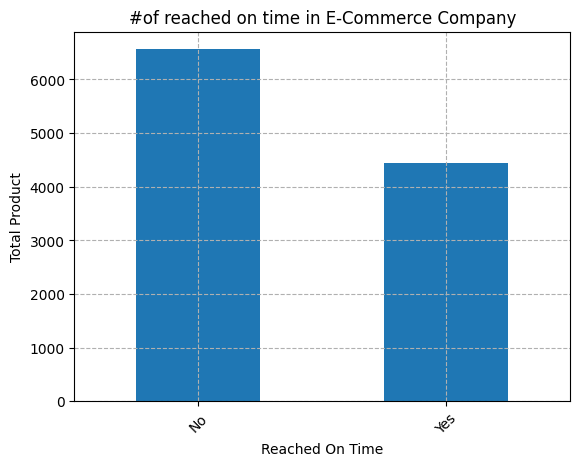

In [96]:
df['Reached.on.Time_Y.N'].value_counts().plot.bar()
plt.grid(linestyle='--')
plt.xlabel('Reached On Time')
plt.ylabel('Total Product')
plt.title('#of reached on time in E-Commerce Company')
x = [0,1]
label=['No','Yes']
plt.xticks(x,label,rotation=45); #No reached on time is more than reached on time

It's a bad sign. `No reached on time` is more than `reached on time`.



## Categorical Feature

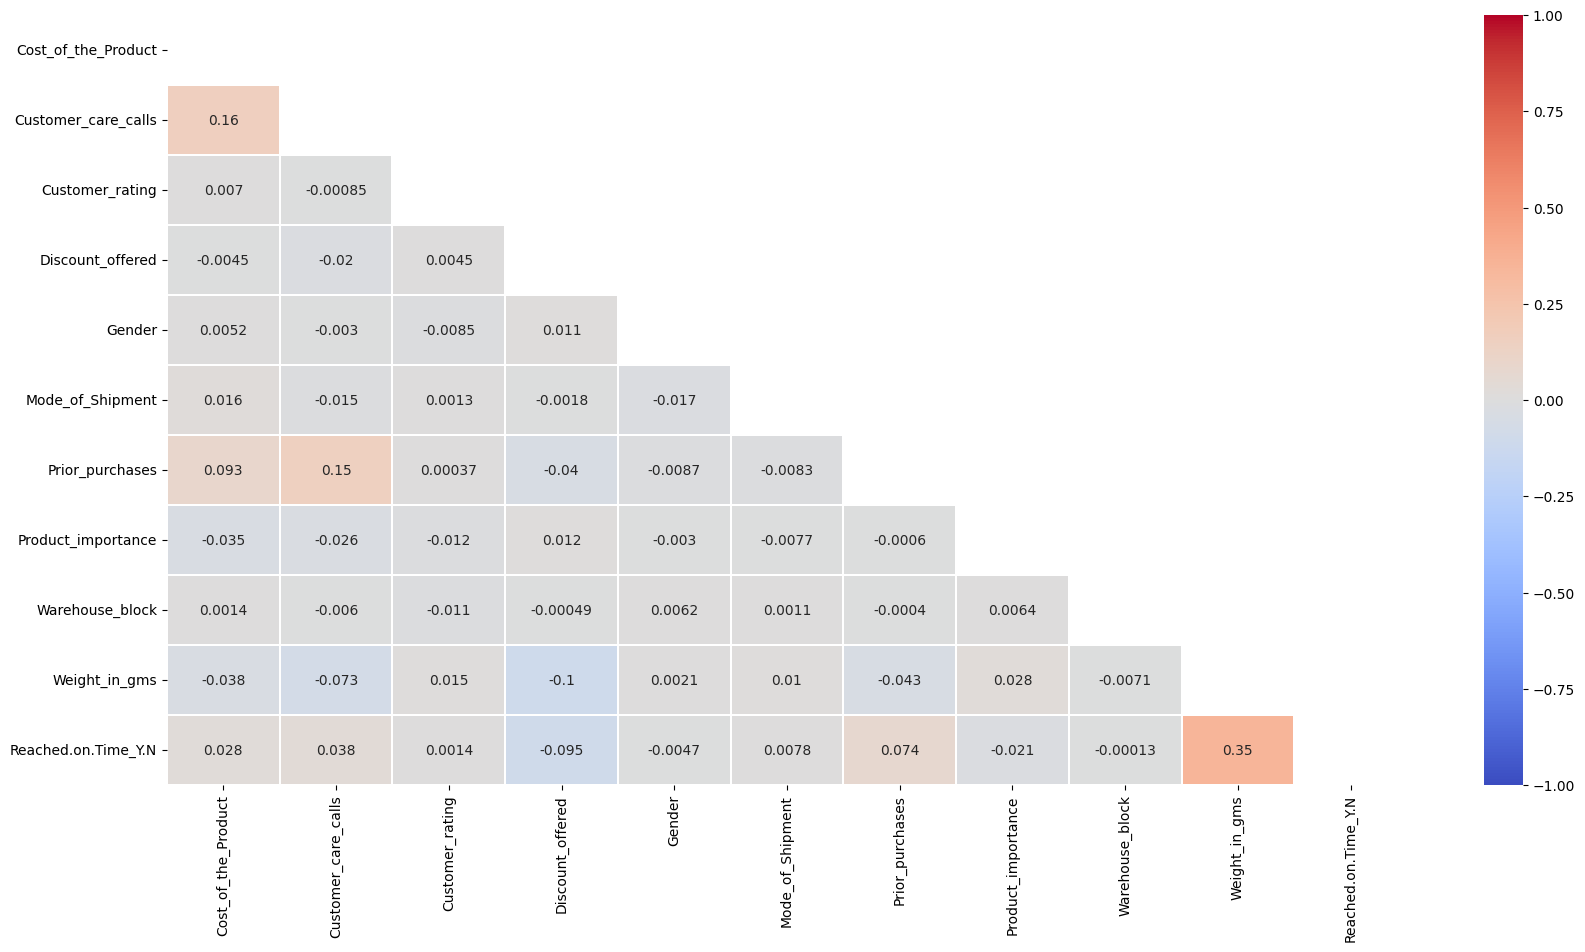

In [97]:
#Vẽ hình ma trận tương quan (correlation matrix) để xem tương quan giữa các biến
plt.figure(figsize=(20, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [98]:
import plotly.express as px
warehouse_counts = df['Warehouse_block'].value_counts()

# Create a pie chart using Plotly
fig = px.pie(values=warehouse_counts, names=warehouse_counts.index, hole=0.5)

# Customize the colors and add labels and title
fig.update_traces(marker=dict(colors=px.colors.sequential.matter_r))
fig.update_traces(textinfo='percent+label')
fig.update_layout(width=650, height=400, title='Warehouse Blocks')

# Show the plot
fig.show()

* This graph displays the usage of five warehouse blocks for product storage.

* The F block had a greater quantity of stored products than the other blocks.

* The remaining blocks have roughly equal quantities of stored products.

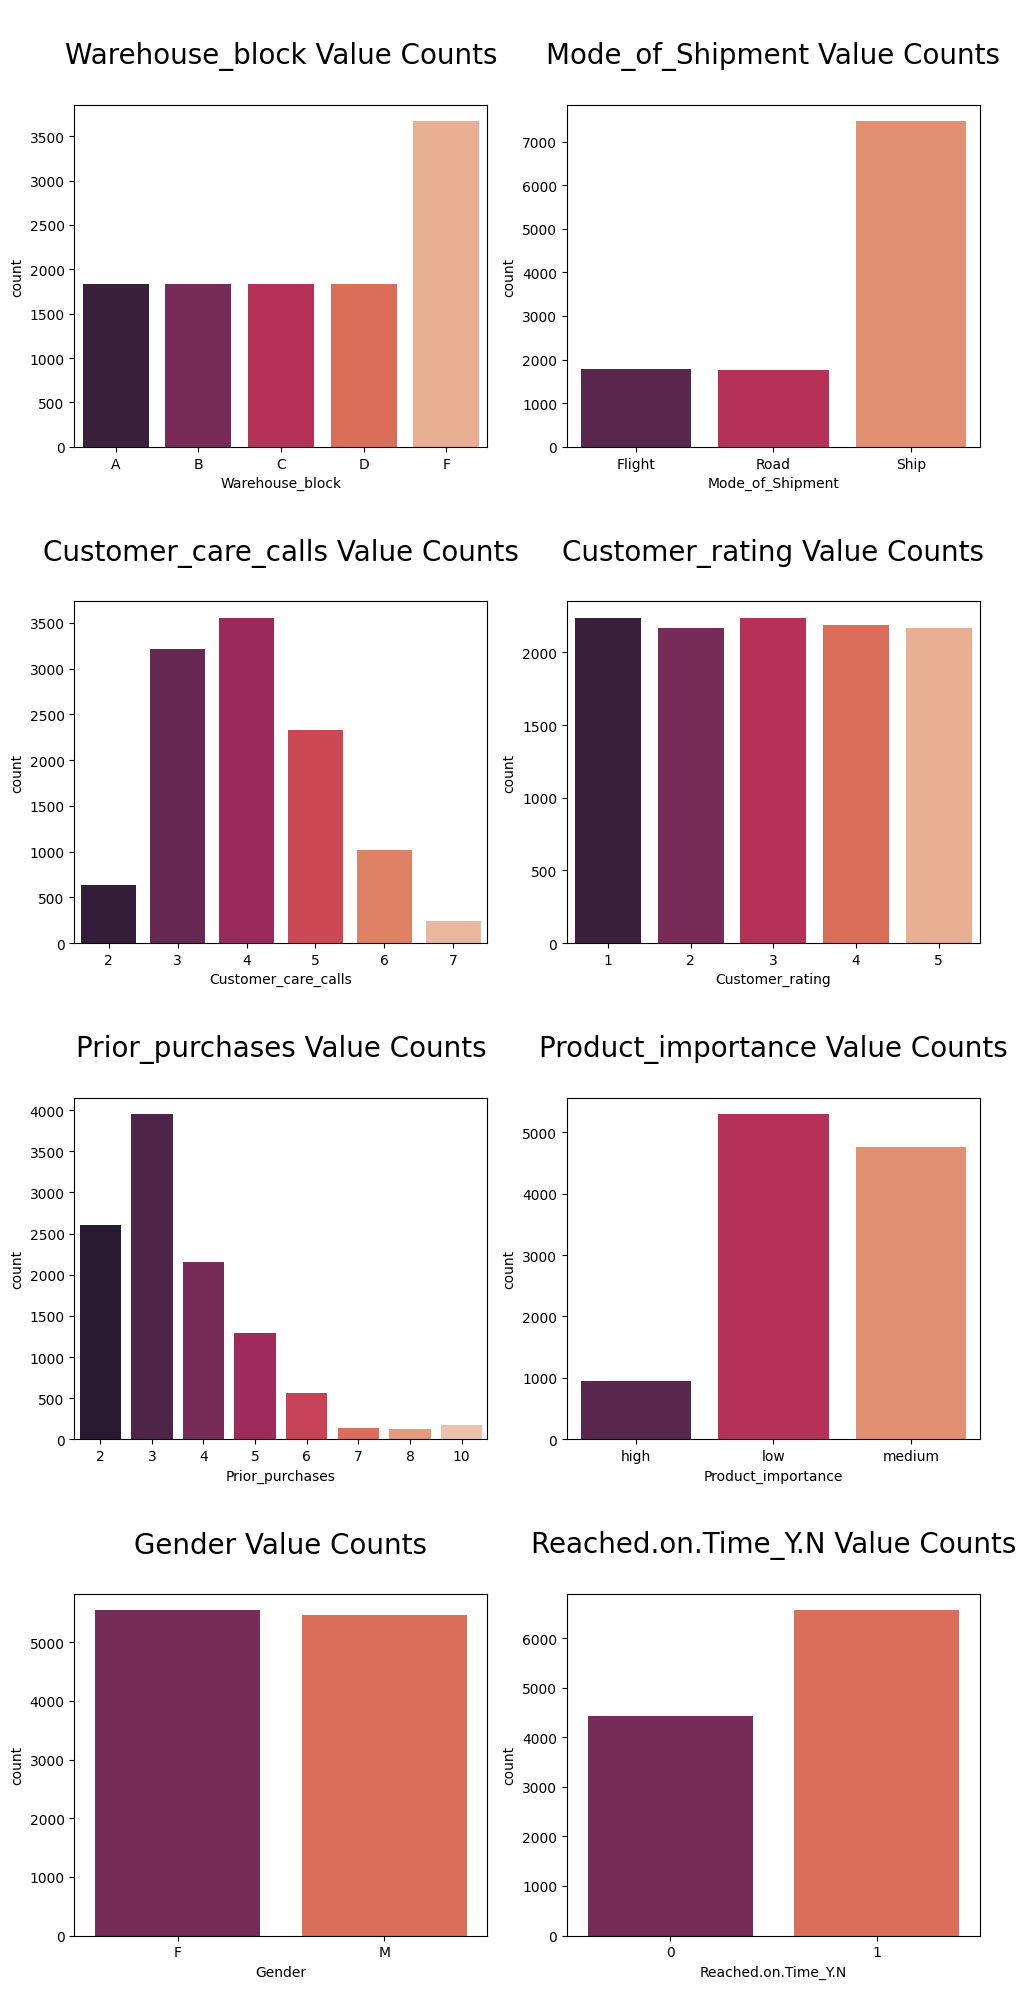

In [99]:
# here by these plots we are lookin at the counts of each categories in the categorical columns
# creating a list of categorical coumns
cat_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

plt.figure(figsize = (10, 20))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(cat_cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = cat_cols[i], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cat_cols[i]} Value Counts\n", fontsize = 20)

    plotnumber += 1

plt.tight_layout()
plt.show()

From the above plots, we can conclude following:-

* Warehouse block F have has more values than all other Warehouse blocks.
* In mode of shipment columns we can clearly see that ship delivers the most of products to the customers.
* Most of the customers calls 3 or 4 times to the customer care centers.
* Customer Ratings does not have much variation.
* Most of the customers have 3 prior purchases.
* We can say that most of the products are of low Importance.
* Gender Column doesn't have much variance.
* More products doesn't reach on time than products reached on time.

In [100]:
df['Customer_care_calls'].value_counts().to_frame()

,Customer_care_calls
4,3557
3,3217
5,2328
6,1013
2,638
7,246


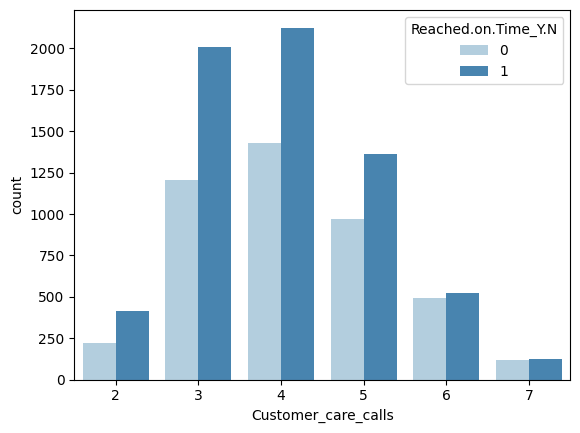

In [101]:
sns.countplot(data = df, x='Customer_care_calls', hue='Reached.on.Time_Y.N', palette = 'Blues');

Ta có thể thấy được càng nhiều cuộc gọi gặp sóc khách hàng thì ...


## Numerical Features

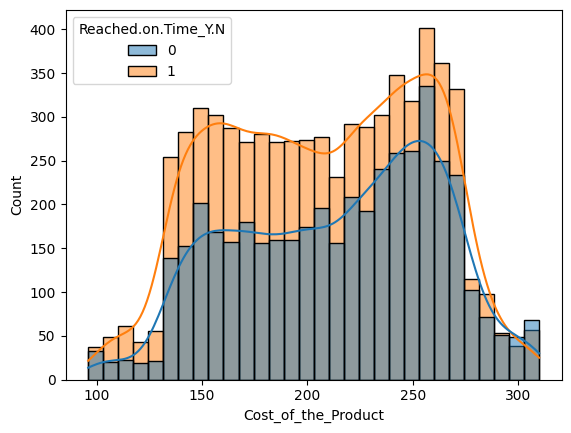

In [102]:
# making a histplot of cost of the product column
sns.histplot(df,x = 'Cost_of_the_Product',hue='Reached.on.Time_Y.N',kde=True);

Có thể thấy giá hàng cao thì sẽ ship đúng thời hạn :))

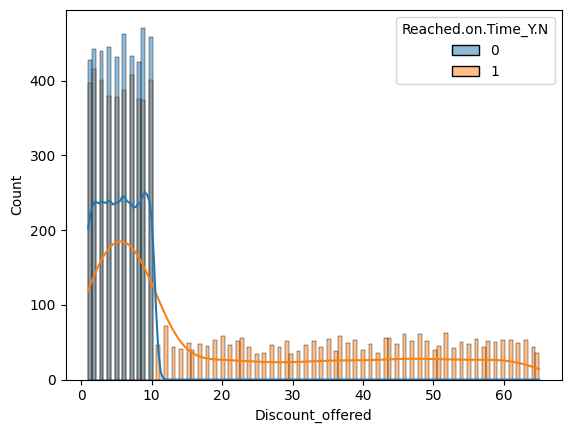

In [103]:
# making a histplot of cost of the product column
sns.histplot(df,x = 'Discount_offered',hue='Reached.on.Time_Y.N',kde=True);

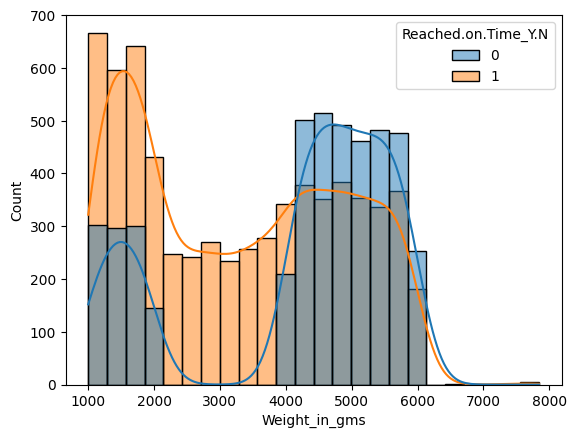

In [104]:
# making a histplot of cost of the product column
sns.histplot(df,x = 'Weight_in_gms',hue='Reached.on.Time_Y.N',kde=True);

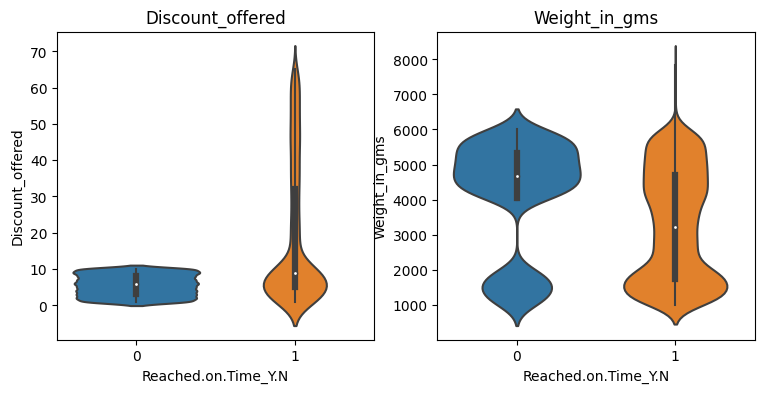

In [105]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
gender_colname = 'Reached.on.Time_Y.N'
columns = ['Discount_offered', 'Weight_in_gms']
for ax, colname in zip(axes, columns):
    sns.violinplot(ax=ax, data=df, x=gender_colname, y=colname)
    ax.set_title(colname)
fig.show()

#3. Data Wrangling

## Encode vs Scale


In [106]:
df.head()

,Cost_of_the_Product,Customer_care_calls,Customer_rating,Discount_offered,Gender,Mode_of_Shipment,Prior_purchases,Product_importance,Warehouse_block,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,177,4,2,44,F,Flight,3,low,D,1233,1
2,216,4,5,59,M,Flight,2,low,F,3088,1
3,183,2,2,48,M,Flight,4,low,A,3374,1
4,176,3,3,10,M,Flight,4,medium,B,1177,1
5,184,2,2,46,F,Flight,3,medium,C,2484,1


In [107]:
# Divide numeric and categorial cols
numeric_col = []
categorical_col = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        numeric_col.append(column)
    elif df[column].dtype == 'category':
        categorical_col.append(column)

print("Numeric Columns:", numeric_col)
print("Categorical Columns:", categorical_col)

Numeric Columns: ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']
Categorical Columns: ['Customer_care_calls', 'Customer_rating', 'Gender', 'Mode_of_Shipment', 'Prior_purchases', 'Product_importance', 'Warehouse_block', 'Reached.on.Time_Y.N']


In [108]:
label_enc = LabelEncoder()
df['Reached.on.Time_Y.N'] = label_enc.fit_transform(df['Reached.on.Time_Y.N'])
y = df['Reached.on.Time_Y.N']

In [109]:
categorical_ode_cols = sorted(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Prior_purchases', 'Gender'])
categorical_ohe_cols = sorted(['Customer_rating','Product_importance'])
numerical_MinMax_cols = sorted(['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms'])
# One-hot encoding
one_hot_encoder = OneHotEncoder()

# Ordinal encoding
ordinal_encoder = OrdinalEncoder()

# MinMax Scaler
minmax_scaler = MinMaxScaler()

data_trans = ColumnTransformer(transformers=[
    ('one_hot', one_hot_encoder, categorical_ohe_cols),
    ('ordinal', ordinal_encoder, categorical_ode_cols),
    ('minmax_scaler', minmax_scaler, numerical_MinMax_cols)
])


In [110]:
trans_df = data_trans.fit_transform(df)
trans_df = pd.DataFrame(data=trans_df, index=df.index,
                        columns=data_trans.get_feature_names_out())
X = trans_df

# 4. Model Training

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

## Logistic Regression

In [112]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [113]:
log_reg.score(X_test,y_test)

0.6481818181818182

In [114]:
y_pred_log_reg = log_reg.predict(X_test)

In [115]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.56      0.59      0.57      1324
           1       0.71      0.69      0.70      1976

    accuracy                           0.65      3300
   macro avg       0.64      0.64      0.64      3300
weighted avg       0.65      0.65      0.65      3300



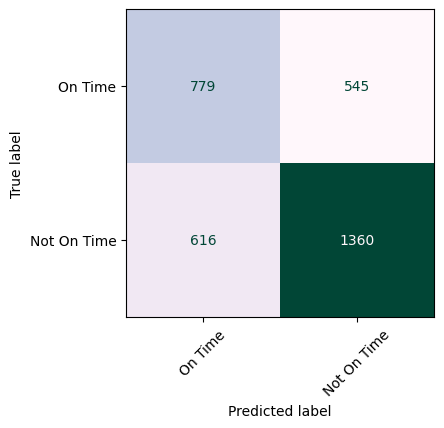

In [116]:
#Đánh giá mô hình bằng confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_log_reg)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['On Time', 'Not On Time']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_log_reg, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="PuBuGn");

## Polynomial Features

In [117]:
poly = PolynomialFeatures(degree=3)
poly_features_X_train = poly.fit_transform(X_train)
poly_feature_X_test = poly.transform(X_test)

In [118]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [119]:
poly_log_reg.score(poly_feature_X_test, y_test)

0.6366666666666667

## Imbalance Data

In [120]:
data_res = SMOTEENN()
X_res, y_res = data_res.fit_resample(X_train, y_train)

In [121]:
log_reg.fit(X_res, y_res)

LogisticRegression(max_iter=1000, solver='liblinear')

In [122]:
log_reg.score(X_test,y_test)

0.6412121212121212

In [123]:
y_pred_log_reg_balance = log_reg.predict(X_test)

In [124]:
print(classification_report(y_test, y_pred_log_reg_balance))

              precision    recall  f1-score   support

           0       0.53      0.98      0.69      1324
           1       0.97      0.41      0.58      1976

    accuracy                           0.64      3300
   macro avg       0.75      0.70      0.63      3300
weighted avg       0.80      0.64      0.62      3300



## Random Forest

In [125]:
random_forest = RandomForestClassifier(n_estimators= 3, max_depth = None, random_state=0)
random_forest.fit(X_res, y_res)

RandomForestClassifier(n_estimators=3, random_state=0)

In [126]:
y_pred_random_forest = random_forest.predict(X_test)

In [127]:
#Đánh giá mô hình
accuracy_score(y_test, y_pred_random_forest)

0.6627272727272727

In [128]:
print(classification_report(y_test, y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.55      0.83      0.66      1324
           1       0.83      0.55      0.66      1976

    accuracy                           0.66      3300
   macro avg       0.69      0.69      0.66      3300
weighted avg       0.72      0.66      0.66      3300



### Hyperparameter turning

In [129]:
random_forest = RandomForestClassifier()

grid_space = {'max_depth':[3, 5, 10, None],
              'n_estimators':[10, 20, 30],
              'criterion':['gini','entropy']
              }
random_forest_grid = GridSearchCV(random_forest, param_grid=grid_space, scoring='accuracy')
model_grid = random_forest_grid.fit(X_res, y_res)

In [130]:
#Hiện thị hyperparameter tốt nhất
model_grid.best_params_

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 30}

In [131]:
y_pred=model_grid.predict(X_test)
accuracy_score(y_test,y_pred)

0.673939393939394

In [132]:
# define
rf_clf = RandomForestClassifier(
    criterion='entropy',
    max_depth=None,
    n_estimators= 30
)
ada_clf = AdaBoostClassifier(
    estimator=rf_clf,
    n_estimators=50,
    learning_rate=1.0,
    random_state=33,
)
# train
ada_clf.fit(X_res, y_res)
# eval
y_pred = ada_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.98      0.71      1324
           1       0.97      0.47      0.63      1976

    accuracy                           0.67      3300
   macro avg       0.76      0.72      0.67      3300
weighted avg       0.80      0.67      0.66      3300



In [133]:
estimator = ada_clf.estimators_[0]
fi = estimator.feature_importances_
fn = X_train.columns.to_numpy()

index = np.flip(np.argsort(fi))
for name, importance in zip(fn[index], fi[index]):
    if importance > 0:
        print(name, importance)

minmax_scaler__Discount_offered 0.32611859343546246
minmax_scaler__Weight_in_gms 0.25907488527981726
minmax_scaler__Cost_of_the_Product 0.108114868534571
ordinal__Prior_purchases 0.07233250695868096
ordinal__Customer_care_calls 0.06480656667777357
ordinal__Warehouse_block 0.04270391166715283
ordinal__Mode_of_Shipment 0.020706432013525355
ordinal__Gender 0.018161259476265672
one_hot__Product_importance_low 0.012455638962817126
one_hot__Customer_rating_3 0.012140925606186613
one_hot__Customer_rating_5 0.012105576213199491
one_hot__Customer_rating_4 0.011388747610263334
one_hot__Customer_rating_2 0.01131299791895037
one_hot__Product_importance_medium 0.010262574972686562
one_hot__Customer_rating_1 0.009627954412940783
one_hot__Product_importance_high 0.008686560259706412


## SVC

In [134]:
SVC_model = SVC(kernel='linear',C = 0.001, gamma=0.0001)
SVC_model.fit(X_res, y_res)

SVC(C=0.001, gamma=0.0001, kernel='linear')

In [135]:
y_pred_SVC = SVC_model.predict(X_test)

In [136]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_SVC))

Accuracy: 0.4012121212121212


In [137]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57      1324
           1       0.00      0.00      0.00      1976

    accuracy                           0.40      3300
   macro avg       0.20      0.50      0.29      3300
weighted avg       0.16      0.40      0.23      3300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Hyperparameter

In [138]:
# define hyper parameter + search space
sv_clf = SVC(C=1.0, kernel='rbf', degree=3,
             gamma='scale', coef0=0.0, shrinking=True)
params = {
    'C': loguniform(0.001, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': randint(1, 5),
    'gamma': ['scale', 'auto'],
}

rand_search = RandomizedSearchCV(
    estimator=sv_clf,
    param_distributions=params,
    n_iter=15,
    cv=StratifiedKFold(5),
    scoring='accuracy',
    verbose=2,
)

In [139]:
rand_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END C=0.0010727690853335927, degree=3, gamma=scale, kernel=poly; total time=   2.0s
[CV] END C=0.0010727690853335927, degree=3, gamma=scale, kernel=poly; total time=   1.9s
[CV] END C=0.0010727690853335927, degree=3, gamma=scale, kernel=poly; total time=   2.0s
[CV] END C=0.0010727690853335927, degree=3, gamma=scale, kernel=poly; total time=   1.9s
[CV] END C=0.0010727690853335927, degree=3, gamma=scale, kernel=poly; total time=   2.4s
[CV] END C=5.524917916765346, degree=3, gamma=auto, kernel=rbf; total time=   3.1s
[CV] END C=5.524917916765346, degree=3, gamma=auto, kernel=rbf; total time=   2.2s
[CV] END C=5.524917916765346, degree=3, gamma=auto, kernel=rbf; total time=   2.2s
[CV] END C=5.524917916765346, degree=3, gamma=auto, kernel=rbf; total time=   2.2s
[CV] END C=5.524917916765346, degree=3, gamma=auto, kernel=rbf; total time=   2.2s
[CV] END C=0.06987759419278025, degree=2, gamma=scale, kernel=sigmoid; total ti

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=SVC(), n_iter=15,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b584893c850>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b584bab1690>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='accuracy', verbose=2)

In [140]:
rand_search.best_params_

{'C': 0.028500175012947306, 'degree': 1, 'gamma': 'auto', 'kernel': 'linear'}

In [141]:
tuned_sv_clf = rand_search.best_estimator_

In [142]:
# evaluate
y_pred = tuned_sv_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.74      0.64      1324
           1       0.78      0.62      0.69      1976

    accuracy                           0.67      3300
   macro avg       0.67      0.68      0.67      3300
weighted avg       0.70      0.67      0.67      3300

